In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
key_accuracy= 'Top1_Acc_Stream/eval_phase/test_stream/Task000'
key_experience_accuracy='Top1_Acc_Exp/eval_phase/test_stream/Task000/'
test_loss='Loss_Stream/eval_phase/test_stream/Task000'
single_experiences=True
classes_order=[(0, 1),(2, 3),(4, 5),(6, 7),(8, 9),(0, 1),(2, 3),(4, 5),(6, 7),(8, 9)]

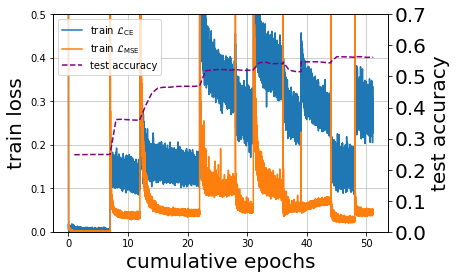

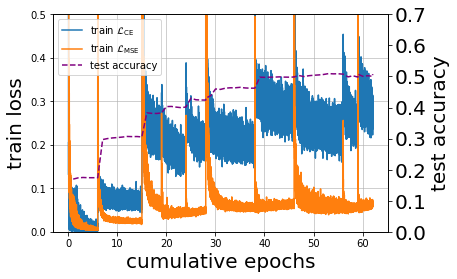

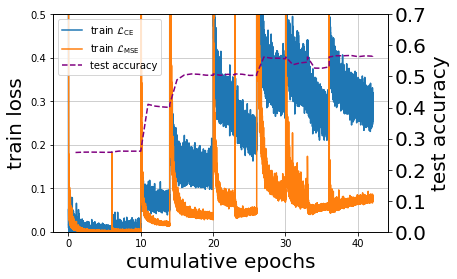

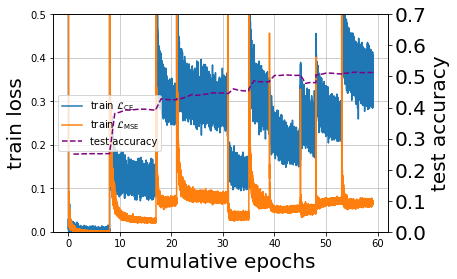

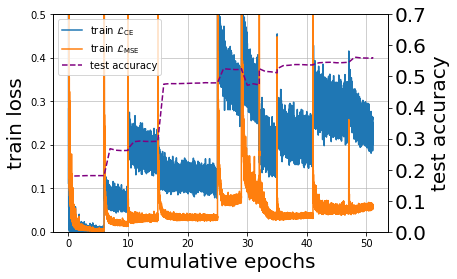

In [3]:
title='multi_pretrained_multi_aux_10_1000_es_baseloss'
path='cdcl/debug/'+title

directories= [d for d in os.listdir(path)]


#to collect results
test_acc=dict()
accs=[]
l01=[]
l23=[]
l45=[]
l67=[]
l89=[]

#for the subscrits in the plots
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

for d in directories:
    if 'ASSESS' in d:
                    plt_folder=path+'/'+d+'/plots'
                    os.makedirs(plt_folder, exist_ok=True)
                    order=[]
                    for x in range(5):
                        order.append([])
                    for i,x in enumerate(classes_order):
                        if 1 in x:
                            order[0].append(i)
                        elif 2 in x:
                            order[1].append(i)
                        elif 4 in x:
                            order[2].append(i)
                        elif 6 in x:
                            order[3].append(i)
                        elif 9 in x:
                            order[4].append(i)

                    fig, ax = plt.subplots() 
                    #fig.suptitle(title)

                    test_acc[d]=dict()
                    with open(path+'/'+d+'/ce.json') as metrics:
                        all_metrics = json.load(metrics)
                        x_epochs=[]
                        for x in range(len(all_metrics)):
                            x_epochs.append(x/1000)
                        
                        l2=ax.plot(x_epochs,all_metrics, label='train $\mathcal{L}_{CE}$')
                    with open(path+'/'+d+'/mse.json') as metrics:
                        all_metrics = json.load(metrics)
                        l1=ax.plot(x_epochs,all_metrics, label='train $\mathcal{L}_{MSE}$')               
                    ax1 = ax.twinx() 
                    with open(path+'/'+d+'/metrics.json') as metrics:
                        all_metrics = json.load(metrics)
                        x_epochs=[]
                        for x in all_metrics[test_loss][0]:
                            x_epochs.append(x/1000)
                        test_acc[d][path.split('/')[-1]]=all_metrics[key_accuracy][1][-1]
                        l3=ax1.plot(x_epochs,all_metrics[key_accuracy][1], label='test accuracy', color='purple', linestyle='dashed')                        
                        ax.set_ylim(0,0.5)
                  
                    curves = l2+l1+l3
                    labs = [curve.get_label() for curve in curves]
                    ax.set_ylabel('train loss', color = 'black',fontsize=20) 
                    ax1.set_ylabel('test accuracy', color = 'black',fontsize=20) 
                    ax.set_xlabel('cumulative epochs', color = 'black',fontsize=20) 
                    ax1.set_ylim(0,0.7)
                    ax.grid(linewidth=0.6)
                    plt.yticks(fontsize=20)
                    plt.xticks(rotation=-60,fontsize=20)
                    ax.legend(curves, labs, loc=0)
                    plt.savefig(plt_folder+"/mse_ce_losses.pdf", format="pdf", bbox_inches="tight")
                    fig.show()


### plot the losses vs the accuracy during the training

### plot losses and accuracy divided by couple of classes

ASSESS3
ASSESS3


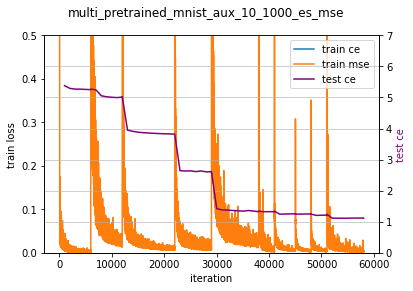

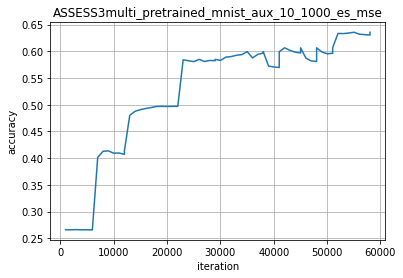

ASSESS3
0.6357748


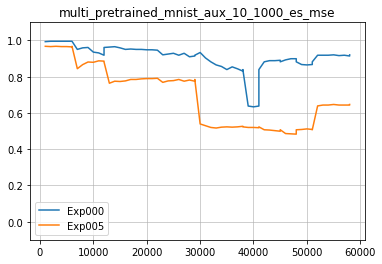

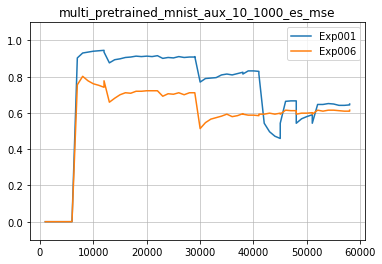

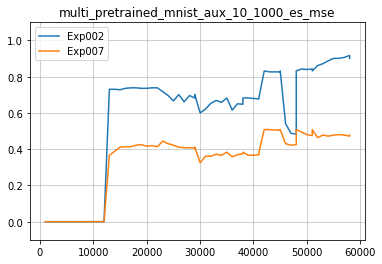

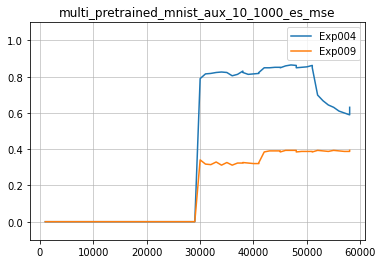

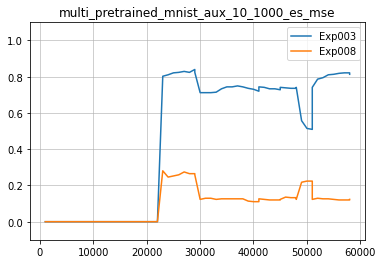

ASSESS1
ASSESS1


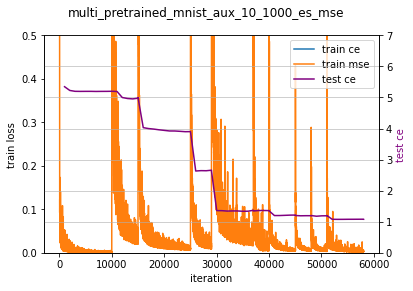

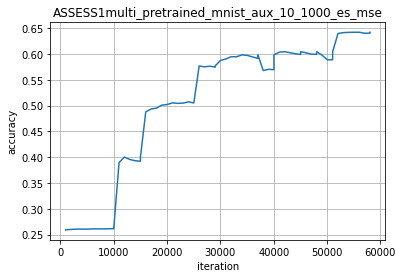

ASSESS1
0.642003


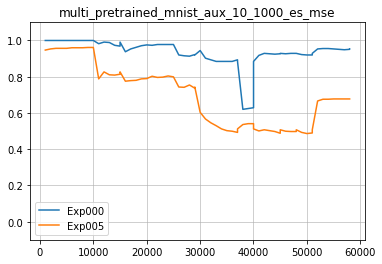

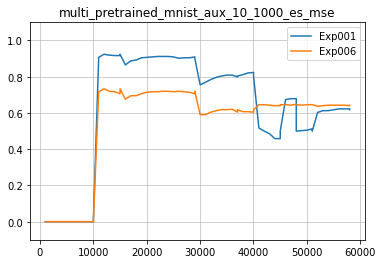

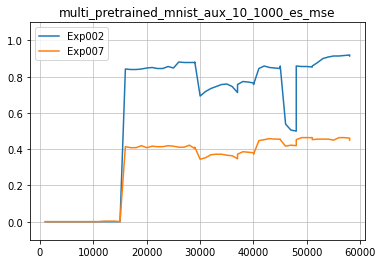

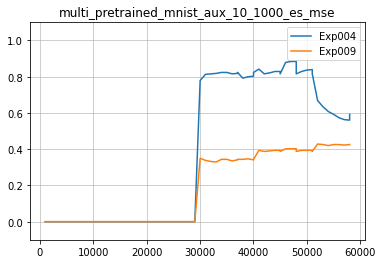

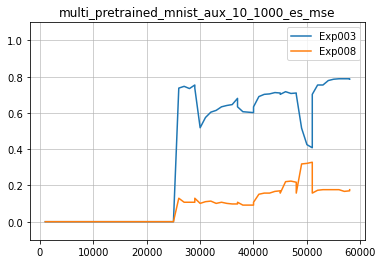

ASSESS2
ASSESS2


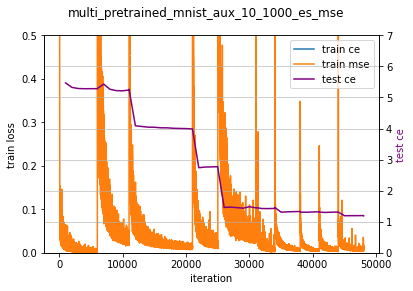

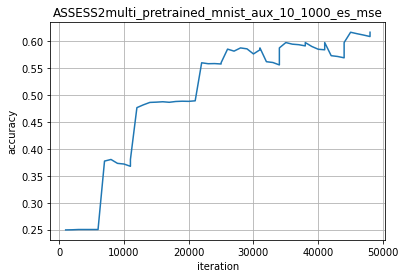

ASSESS2
0.6170902


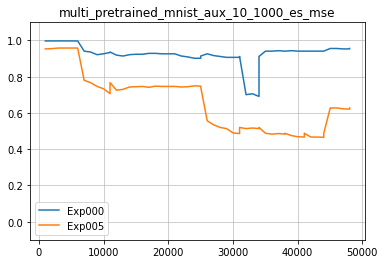

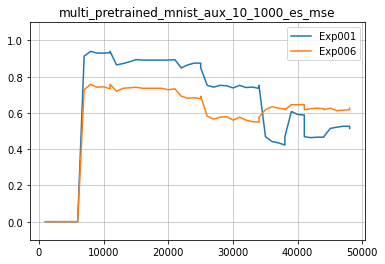

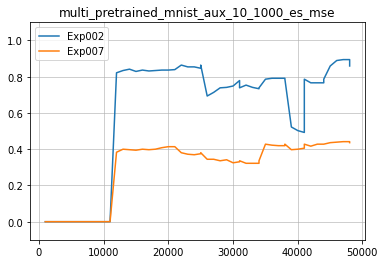

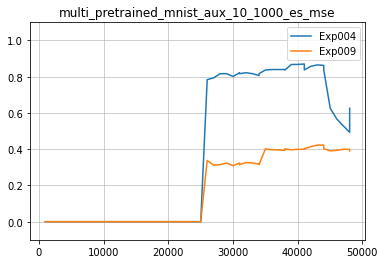

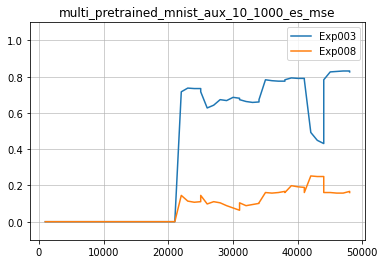

ASSESS4
ASSESS4


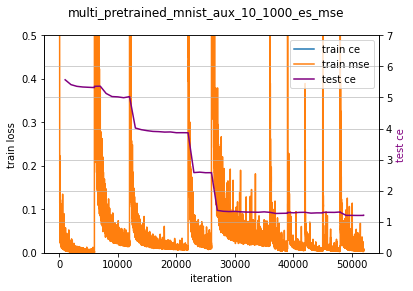

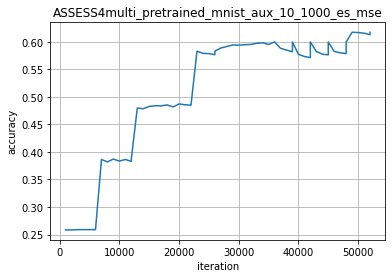

ASSESS4
0.6175884


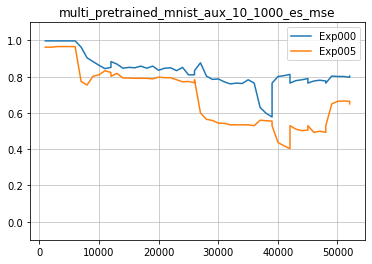

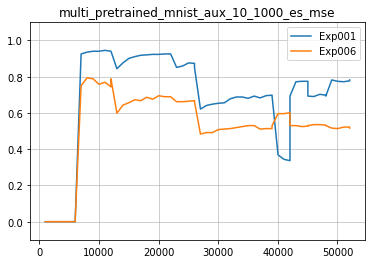

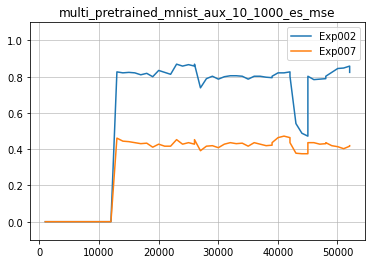

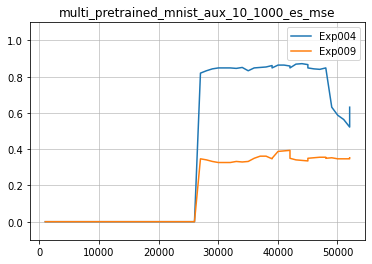

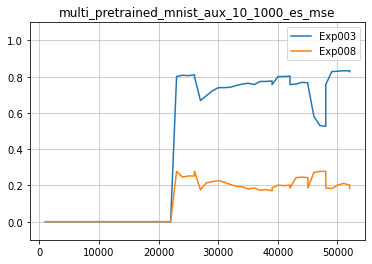

ASSESS0
ASSESS0


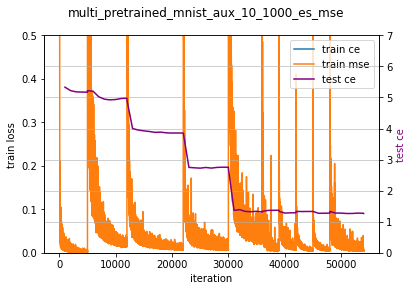

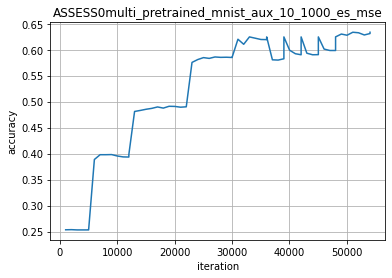

ASSESS0
0.6335326


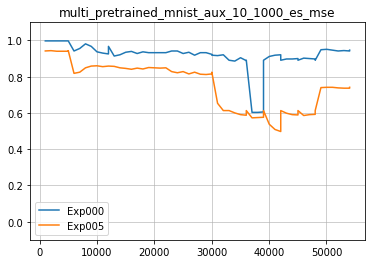

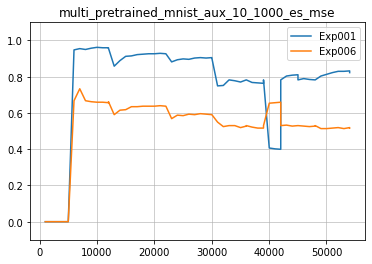

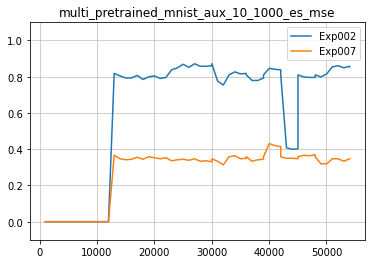

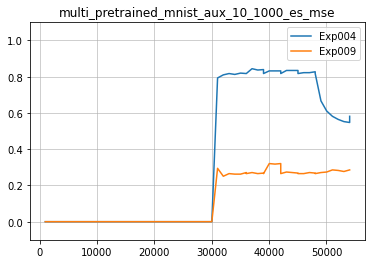

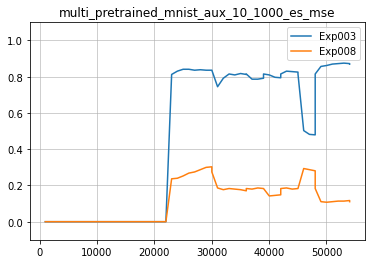

In [45]:
title='multi_pretrained_mnist_aux_10_1000_es_mse'
path='cdcl/debug//'+title

directories= [d for d in os.listdir(path)]

test_acc=dict()
accs=[]
l01=[]
l23=[]
l45=[]
l67=[]
l89=[]
leng=82 #necessary for the plots of the means
for d in directories:
    if 'ASSESS'  in d :
                plt_folder=path+'/'+d+'/plots'
                os.makedirs(plt_folder, exist_ok=True)
                order=[]
                for x in range(5):
                    order.append([])
                for i,x in enumerate(classes_order):
                    if 1 in x:
                        order[0].append(i)
                    elif 2 in x:
                        order[1].append(i)
                    elif 4 in x:
                        order[2].append(i)
                    elif 6 in x:
                        order[3].append(i)
                    elif 9 in x:
                        order[4].append(i)
                        
               
                fig, ax = plt.subplots() 
                ax1 = ax.twinx() 
                print(d)
                ax1.grid(linewidth=0.6)
                fig.suptitle(title)
                try:
                    test_acc[d]=dict()
                    with open(path+'/'+d+'/ce.json') as metrics:
                        all_metrics = json.load(metrics)
                        l2=ax.plot(all_metrics, label='train ce')
                        
                        #print(all_metrics)
                    with open(path+'/'+d+'/mse.json') as metrics:
                        all_metrics = json.load(metrics)
                        l1=ax.plot(all_metrics, label='train mse')
                    with open(path+'/'+d+'/metrics.json') as metrics:
                        all_metrics = json.load(metrics)
                        test_acc[d][path.split('/')[-1]]=all_metrics[key_accuracy][1][-1]
                        #l3=ax1.plot(all_metrics[x][0],all_metrics[x][1], label=d)
                        l3=ax1.plot(all_metrics[test_loss][0],all_metrics[test_loss][1], label='test ce', color='purple')
                        ax.set_ylim(0,0.5)
                 
                except:
                    print('no in '+path+'/'+d+'/ce2.json')   
                curves = l2+l1+l3
                labs = [curve.get_label() for curve in curves]
                ax1.set_ylabel('test ce', color = 'purple') 
                ax.set_ylabel('train loss', color = 'black') 
                ax.set_xlabel('iteration', color = 'black') 

                #ax.set_yticks([])
                #ax1.set_xticks([])

                ax1.set_ylim(0,7)
                ax.legend(curves, labs, loc=0)
                
                fig.show()
            
                if single_experiences:
                            with open(path+'/'+d+'/metrics.json') as metrics:
                                all_metrics = json.load(metrics)
                            print(d)
                            for x in all_metrics.keys():
                                if x[:6] != 'images':
                                    if x==key_accuracy:
                                        plt.figure()
                                        plt.title(d+title)
                                        plt.plot(all_metrics[x][0],all_metrics[x][1], label=path.split('/')[-1])

                                        if len(all_metrics[x][1])<leng:
                                            for add in range(leng-len(all_metrics[x][1])):
                                                all_metrics[x][1].append(all_metrics[x][1][-1])
                                    
                                        accs.append(np.array(all_metrics[x][1]).T)
                                        plt.xlabel('iteration')
                                        plt.ylabel('accuracy')
                                        #plt.ylim(0.2,0.65)
                                        plt.grid()
                                        
                                
                                        plt.savefig(plt_folder+'/'+title+'.pdf', format="pdf", bbox_inches="tight")
                                        plt.show()
                                        print(d)
                                        print(all_metrics[x][1][-1])
                            for x in all_metrics.keys():
                                if key_experience_accuracy in x:

                                    if int(x[-1]) in order[0]:
                                        plt.title(title)
                                        plt.plot(all_metrics[x][0],all_metrics[x][1], label=x.split('/')[-1])
                                        if len(all_metrics[x][1])==leng:
                                            x_to_use=all_metrics[x][0]
                                        if len(all_metrics[x][1])<leng:
                                            for add in range(leng-len(all_metrics[x][1])):
                                                all_metrics[x][1].append(all_metrics[x][1][-1])
                                        l01.append(all_metrics[x][1])

                                
                            plt.grid(linewidth=0.6)   
                            plt.ylim(-0.1,1.1)
                            plt.legend()
                            plt.savefig(plt_folder+'/'+title+"01.pdf", format="pdf", bbox_inches="tight")
                            plt.show()
                            for x in all_metrics.keys():
                                if key_experience_accuracy in x:

                                    if int(x[-1]) in order[1]:
                                        plt.title(title)
                                        plt.plot(all_metrics[x][0],all_metrics[x][1], label=x.split('/')[-1])
                                         
                                        if len(all_metrics[x][1])<leng:
                                            for add in range(leng-len(all_metrics[x][1])):
                                                all_metrics[x][1].append(all_metrics[x][1][-1])
                                        l23.append(all_metrics[x][1])
                            plt.grid(linewidth=0.6) 
                            plt.ylim(-0.1,1.1)
                            plt.legend()
                            plt.savefig(plt_folder+'/'+title+"23.pdf", format="pdf", bbox_inches="tight")
                            plt.show()
                            for x in all_metrics.keys():
                                if key_experience_accuracy in x:

                                    if int(x[-1]) in order[2]:
                                        plt.title(title)
                                        plt.plot(all_metrics[x][0],all_metrics[x][1], label=x.split('/')[-1])
                                        
                                        if len(all_metrics[x][1])<leng:
                                            for add in range(leng-len(all_metrics[x][1])):
                                                all_metrics[x][1].append(all_metrics[x][1][-1])
                                        l45.append(all_metrics[x][1])
                            plt.legend()
                            plt.grid(linewidth=0.6)  
                            plt.ylim(-0.1,1.1)
                            plt.savefig(plt_folder+'/'+title+"45.pdf", format="pdf", bbox_inches="tight")
                            plt.show()
                            for x in all_metrics.keys():
                                if key_experience_accuracy in x:

                                    if int(x[-1]) in order[4]:
                                        plt.title(title)
                                        plt.plot(all_metrics[x][0],all_metrics[x][1], label=x.split('/')[-1])
                                         
                                        if len(all_metrics[x][1])<leng:
                                            for add in range(leng-len(all_metrics[x][1])):
                                                all_metrics[x][1].append(all_metrics[x][1][-1])
                                        l89.append(all_metrics[x][1])
                            
                            plt.grid(linewidth=0.6) 
                            plt.ylim(-0.1,1.1)        
                            plt.legend()
                            plt.savefig(plt_folder+'/'+title+"89.pdf", format="pdf", bbox_inches="tight")
                            plt.show()

                            for x in all_metrics.keys():
                                if key_experience_accuracy in x:

                                    if int(x[-1]) in order[3]:
                                        plt.title(title)
                                        plt.plot(all_metrics[x][0],all_metrics[x][1], label=x.split('/')[-1])
                                         
                                        if len(all_metrics[x][1])<leng:
                                            for add in range(leng-len(all_metrics[x][1])):
                                                all_metrics[x][1].append(all_metrics[x][1][-1])
                                        l67.append(all_metrics[x][1])
                            plt.grid(linewidth=0.6)  
                            plt.ylim(-0.1,1.1)
                            plt.legend()
                            plt.savefig(plt_folder+'/'+title+"67.pdf", format="pdf", bbox_inches="tight")
                            plt.show()
    

In [46]:
import statistics
l_n=[]
for t in test_acc:
    for t2 in test_acc[t]:
        print(test_acc[t][t2])
        l_n.append(test_acc[t][t2])
average = sum(l_n)/len(l_n)
print('average:')
print(average)
std=(sum([((x - average) ** 2) for x in l_n]) / len(l_n))**0.5
print('stdev:')
print(std)

0.6357748
0.642003
0.6170902
0.6175884
0.6335326
average:
0.6291978
stdev:
0.010073655872621396


In [47]:
means=[]
stds=[]
titles=[]
titles.append(title+'Test accuracy') 
mean=np.mean(accs,axis=0)
means.append(mean)
std=np.std(accs,axis=0)
stds.append(std)
titles.append(title+'Experiences accuracy - classes 0, 1')
titles.append(title+'Experiences accuracy - classes 2, 3')
titles.append(title+'Experiences accuracy - classes 4, 5')
titles.append(title+'Experiences accuracy - classes 6, 7')
titles.append(title+'Experiences accuracy - classes 8, 9')
meanl01=np.mean(l01,axis=0)
means.append(meanl01)
meanl23=np.mean(l23,axis=0)
means.append(meanl23)
meanl45=np.mean(l45,axis=0)
means.append(meanl45)
meanl67=np.mean(l67,axis=0)
means.append(meanl67)
meanl89=np.mean(l89,axis=0)
means.append(meanl89)
stdl01=np.std(l01)
stds.append(stdl01)
stdl23=np.std(l23,axis=0)
stds.append(stdl23)
stdl45=np.std(l45,axis=0)
stds.append(stdl45)
stdl67=np.std(l67,axis=0)
stds.append(stdl67)
stdl89=np.std(l89,axis=0)
stds.append(stdl89)

multi_pretrained_mnist_aux_10_1000_es_mseExperiences accuracy - classes 0, 1


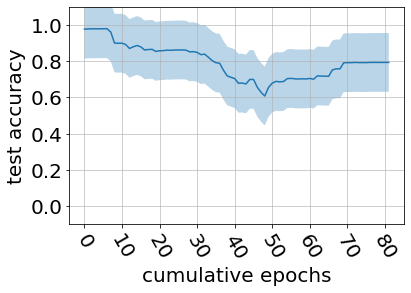

multi_pretrained_mnist_aux_10_1000_es_mseExperiences accuracy - classes 2, 3


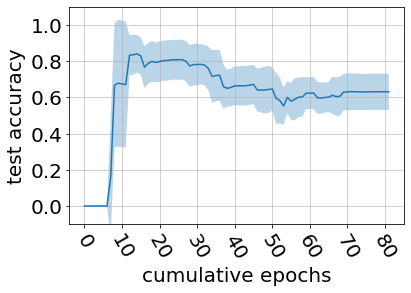

multi_pretrained_mnist_aux_10_1000_es_mseExperiences accuracy - classes 4, 5


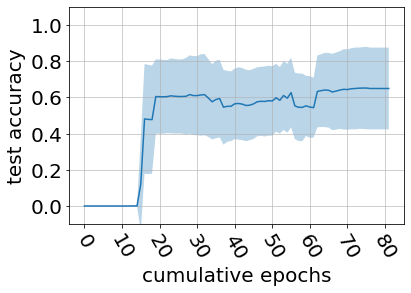

multi_pretrained_mnist_aux_10_1000_es_mseExperiences accuracy - classes 6, 7


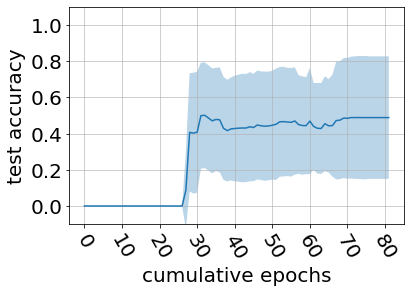

multi_pretrained_mnist_aux_10_1000_es_mseExperiences accuracy - classes 8, 9


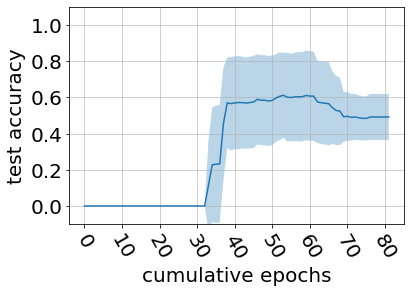

In [48]:
for m, s, t in zip(means,stds,titles):
    if 'Test' not in t:
        print(t)
        M_new_vec = m
        Sigma_new_vec = s

        lower_bound = M_new_vec - Sigma_new_vec
        upper_bound = M_new_vec + Sigma_new_vec
        x=[]
        plt.figure()
        plt.ylabel('test accuracy',fontsize=20)
        plt.xlabel('cumulative epochs',fontsize=20)
        for l in range(len(M_new_vec)):
            x.append(l)
        plt.plot(M_new_vec)
        plt.grid(linewidth=0.6)
        plt.ylim(-0.1,1.1)
        plt.yticks(fontsize=20)                          
        plt.xticks(rotation=-60,fontsize=20)
        plt.fill_between(x, lower_bound, upper_bound, alpha=.3)
        plt.savefig(t+'.pdf', format="pdf", bbox_inches="tight")
        plt.show()